In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

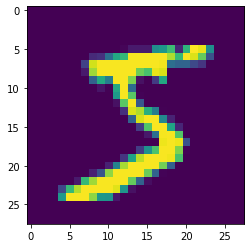

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1) * 2 - 1 

In [10]:
X_train.min()

-1.0

In [11]:
X_train.max()

1.0

In [12]:
only_six = X_train[y_train==6]

In [13]:
only_six.shape

(5918, 28, 28, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape,Dropout, LeakyReLU, Flatten, BatchNormalization, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

In [15]:
np.random.seed(10)
tf.random.set_seed(10)

codings_size = 100

In [16]:
generator = Sequential()
generator.add(Dense(7*7*128, input_shape=[codings_size]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same',
                             activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding='same',
                             activation='tanh'))

In [17]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same',
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same',
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

In [18]:
GAN = Sequential([generator, discriminator])

In [19]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [20]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
GAN.layers

In [22]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [23]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
________________________________________________

In [24]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 425,730
Trainable params: 212,865
Non-trainable params: 212,865
__________________________________________

In [25]:
batch_size = 32

In [26]:
my_data = only_six

In [27]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [28]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [29]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [30]:
epochs = 20

In [31]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f'Epoch No. {epoch +1}')
    
    i = 0
    for X_batch in dataset:
        i= i+1
        if i%20 == 0:
            print(f'Current batch {i} of {len(my_data)//batch_size}')
            
            noise = tf.random.normal(shape=[batch_size, codings_size])
            gen_images = generator(noise)
            
            X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
            
            y1 = tf.constant([[0.]] * batch_size + [[1.]] *batch_size)
            
            discriminator.trainable = True
            
            discriminator.train_on_batch(X_fake_vs_real, y1)
            
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            
            discriminator.trainable = False
            
            GAN.train_on_batch(noise, y2)

print('Completed')
                    
          

Epoch No. 1
Current batch 20 of 184
Current batch 40 of 184
Current batch 60 of 184
Current batch 80 of 184
Current batch 100 of 184
Current batch 120 of 184
Current batch 140 of 184
Current batch 160 of 184
Current batch 180 of 184
Epoch No. 2
Current batch 20 of 184
Current batch 40 of 184
Current batch 60 of 184
Current batch 80 of 184
Current batch 100 of 184
Current batch 120 of 184
Current batch 140 of 184
Current batch 160 of 184
Current batch 180 of 184
Epoch No. 3
Current batch 20 of 184
Current batch 40 of 184
Current batch 60 of 184
Current batch 80 of 184
Current batch 100 of 184
Current batch 120 of 184
Current batch 140 of 184
Current batch 160 of 184
Current batch 180 of 184
Epoch No. 4
Current batch 20 of 184
Current batch 40 of 184
Current batch 60 of 184
Current batch 80 of 184
Current batch 100 of 184
Current batch 120 of 184
Current batch 140 of 184
Current batch 160 of 184
Current batch 180 of 184
Epoch No. 5
Current batch 20 of 184
Current batch 40 of 184
Current 

In [33]:
noise = tf.random.normal(shape=[10, codings_size])

In [34]:
noise.shape

TensorShape([10, 100])

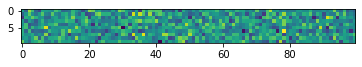

In [35]:
plt.imshow(noise)

In [36]:
images = generator(noise)

In [37]:
sin_image = images[0]

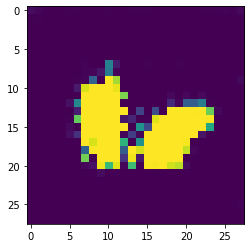

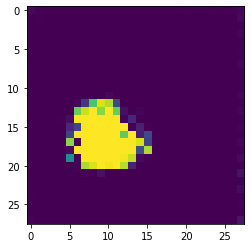

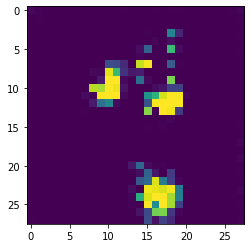

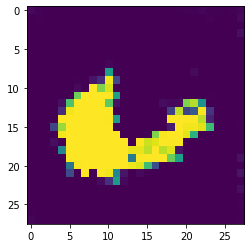

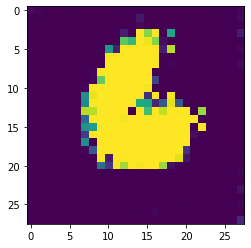

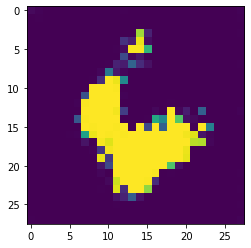

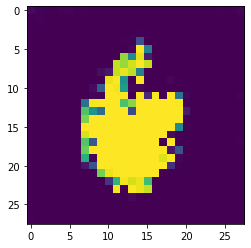

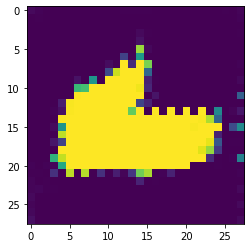

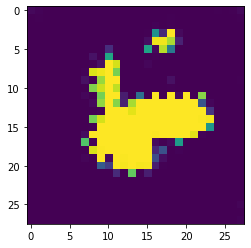

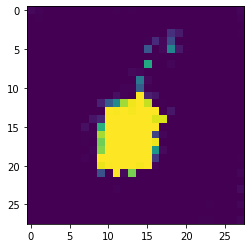

In [38]:
for image in images:
    plt.imshow(image.numpy().reshape(28, 28))
    plt.show()